# General notebook for visualizing scripts and scratches results

Compatible scripts:

DQN:
* script40


In [7]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

def db_to_power(x):
    return 10**(x/10)
# %matplotlib inline

# Testing data

In [8]:
FILE_NAME = 'script45'
filepath = f'D:\\Dev\\sys-simulator-2\\data\\dql\\{FILE_NAME}.pickle'
# filepath = 'D:\\Dev\\sys-simulator-2\\data\\a3c\\scratch7.pickle'
file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

## MUE success rate

Text(0.5, 0, 'Number of D2D pairs')

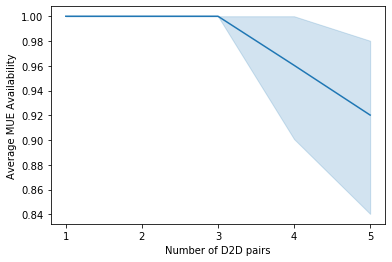

In [9]:
mue_success_rate = np.array(data['mue_success_rate'])
aux = np.ones((mue_success_rate.shape[0], np.prod(mue_success_rate.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_success_rate.reshape(-1)
# dataframe
df = pd.DataFrame({'success': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="success", data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average MUE Availability')
plt.xlabel('Number of D2D pairs')

## MUE Spectral Efficiencies

In [11]:
data['mue_sinr_threshold']

6

Text(0.5, 0, 'Number of D2D pairs')

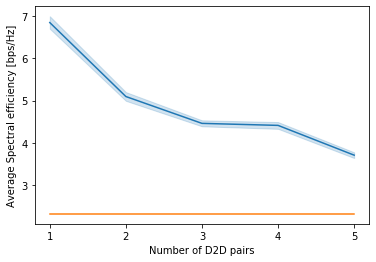

In [12]:
mue_speffs = np.array(data['mue_speffs'])
aux = np.ones((mue_speffs.shape[0], np.prod(mue_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_speffs.reshape(-1)

df = pd.DataFrame({'speffs': aux2, 'n_d2d': n_d2d})
df['dummy'] = 'Spectral Efficiency'

speff_threshold = np.log2(1 + db_to_power(data['mue_sinr_threshold'])) 
baseline = speff_threshold * np.ones(mue_speffs.shape[0])

sns.lineplot(x="n_d2d", y="speffs",data=df)

plt.plot(x_ticks, baseline)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

In [25]:
mask = mue_success_rate[4] != 1
mue_success_rate[4][mask]

array([0.  , 0.  , 0.  , 0.01])

In [33]:
mue_speffs[4][mask][3]

array([0.05539133, 2.8476421 , 0.06190027, 0.15309275, 0.30387558,
       0.32124489, 0.36251481, 0.06098352, 0.0553464 , 0.05631575,
       0.39313983, 0.06764472, 0.33285123, 0.08035847, 0.08012084,
       0.05552381, 0.36009383, 0.07040057, 0.34736941, 0.08129181,
       0.0802699 , 0.05552381, 0.42662492, 0.07211207, 0.35725645,
       0.0687581 , 0.30877088, 0.07899798, 0.07779013, 0.05465675,
       0.34239548, 0.07040057, 0.33626851, 0.08141394, 0.08032776,
       0.05646853, 0.05631575, 0.34428442, 0.06764472, 0.32004879,
       0.08035847, 0.08012084, 0.05552381, 0.36009383, 0.07048377,
       0.3562515 , 0.08300094, 0.082603  , 0.05379543, 0.33835012,
       0.06969954, 0.3445825 , 0.08129181, 0.07966487, 0.05552381,
       0.36009383, 0.07048377, 0.3562515 , 0.08300094, 0.082603  ,
       0.05379543, 0.33081079, 0.06969954, 0.3445825 , 0.08129181,
       0.08104863, 0.0557449 , 0.39645331, 0.07157032, 0.36156309,
       0.08085096, 0.07984004, 0.05643879, 0.37537536, 0.07130

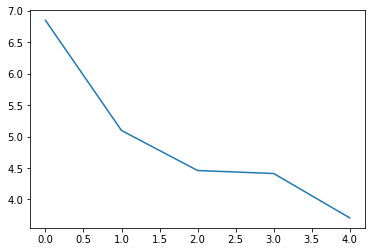

In [13]:
avgs = np.mean(mue_speffs, axis=(1,2))
plt.plot(avgs)

In [14]:
std_mue_success_rate = np.std(mue_success_rate, axis=1).tolist()
mean_mue_speffs = np.mean(mue_success_rate, axis=1).tolist()

## D2D Summed Spectral Efficiencies

Text(0.5, 0, 'Number of D2D pairs')

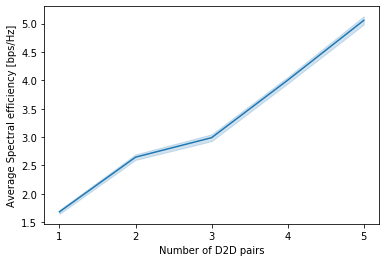

In [15]:
d2d_speffs = np.array(data['d2d_speffs'])
aux = np.ones((d2d_speffs.shape[0], np.prod(d2d_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = d2d_speffs.reshape(-1)
# dataframe
df = pd.DataFrame({'speff': aux2, 'n_d2d': n_d2d})
# plot
sns.lineplot(x="n_d2d", y="speff",data=df)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

[1.6820747  2.64602776 2.98967044 4.00329723 5.05752364]


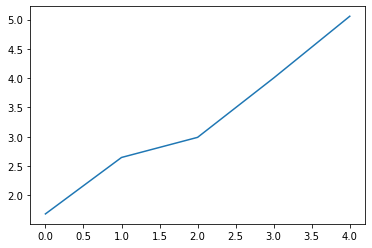

In [16]:
avgs = np.mean(d2d_speffs, axis=(1,2))
print(avgs)
plt.plot(avgs)

## Summed rewards

In [17]:
rewards = data['rewards']
plt.plot(range(1, len(mue_success_rate)+1, 1), rewards)
plt.xticks(range(1, len(mue_success_rate)+1, 1))
plt.ylabel('Average Summed Reward')
plt.xlabel('Number of D2D pairs')

ValueError: setting an array element with a sequence.